# Use decision trees to prepare a model on fraud data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [2]:
df=pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
tax=pd.cut(df['Taxable.Income'],bins=[0,30001,100000],labels=['Risky','Good'])
tax

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [7]:
df['Taxable.Income']=tax
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [8]:
le=preprocessing.LabelEncoder()
df['Urban']=le.fit_transform(df['Urban'])
df['Undergrad']=le.fit_transform(df['Undergrad'])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,Single,Good,50047,10,1
1,1,Divorced,Good,134075,18,1
2,0,Married,Good,160205,30,1
3,1,Single,Good,193264,15,1
4,0,Married,Good,27533,28,0
...,...,...,...,...,...,...
595,1,Divorced,Good,39492,7,1
596,1,Divorced,Good,55369,2,1
597,0,Divorced,Good,154058,0,1
598,1,Married,Good,180083,17,0


In [9]:
x = df.drop('Taxable.Income',axis=1)
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,Single,50047,10,1
1,1,Divorced,134075,18,1
2,0,Married,160205,30,1
3,1,Single,193264,15,1
4,0,Married,27533,28,0
...,...,...,...,...,...
595,1,Divorced,39492,7,1
596,1,Divorced,55369,2,1
597,0,Divorced,154058,0,1
598,1,Married,180083,17,0


In [10]:
x = pd.get_dummies(x)
x

,Undergrad,City.Population,Work.Experience,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,0,50047,10,1,0,0,1
1,1,134075,18,1,1,0,0
2,0,160205,30,1,0,1,0
3,1,193264,15,1,0,0,1
4,0,27533,28,0,0,1,0
...,...,...,...,...,...,...,...
595,1,39492,7,1,1,0,0
596,1,55369,2,1,1,0,0
597,0,154058,0,1,1,0,0
598,1,180083,17,0,0,1,0


In [11]:
df['Taxable.Income']= le.fit_transform(df['Taxable.Income']) 
df['Taxable.Income']

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int32

In [12]:
y = 1- df['Taxable.Income']
y.describe()

count    600.000000
mean       0.793333
std        0.405252
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Taxable.Income, dtype: float64

In [13]:
colnames = list(x.columns)
colnames

['Undergrad',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single']

In [14]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

In [15]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'X[1] <= 63983.0\nentropy = 0.722\nsamples = 480\nvalue = [96, 384]'),
 Text(0.3, 0.625, 'X[2] <= 23.5\nentropy = 0.537\nsamples = 106\nvalue = [13, 93]'),
 Text(0.2, 0.375, 'X[1] <= 40128.5\nentropy = 0.635\nsamples = 81\nvalue = [13, 68]'),
 Text(0.1, 0.125, 'entropy = 0.811\nsamples = 36\nvalue = [9, 27]'),
 Text(0.3, 0.125, 'entropy = 0.433\nsamples = 45\nvalue = [4, 41]'),
 Text(0.4, 0.375, 'entropy = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(0.7, 0.625, 'X[1] <= 64532.5\nentropy = 0.764\nsamples = 374\nvalue = [83, 291]'),
 Text(0.6, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.375, 'X[5] <= 0.5\nentropy = 0.756\nsamples = 372\nvalue = [81, 291]'),
 Text(0.7, 0.125, 'entropy = 0.691\nsamples = 254\nvalue = [47, 207]'),
 Text(0.9, 0.125, 'entropy = 0.866\nsamples = 118\nvalue = [34, 84]')]

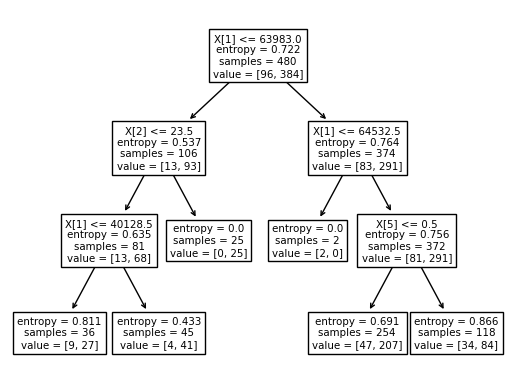

In [16]:
tree.plot_tree(model)

[Text(0.5, 0.875, 'City.Population <= 63983.0\nentropy = 0.722\nsamples = 480\nvalue = [96, 384]\nclass = Good'),
 Text(0.3, 0.625, 'Work.Experience <= 23.5\nentropy = 0.537\nsamples = 106\nvalue = [13, 93]\nclass = Good'),
 Text(0.2, 0.375, 'City.Population <= 40128.5\nentropy = 0.635\nsamples = 81\nvalue = [13, 68]\nclass = Good'),
 Text(0.1, 0.125, 'entropy = 0.811\nsamples = 36\nvalue = [9, 27]\nclass = Good'),
 Text(0.3, 0.125, 'entropy = 0.433\nsamples = 45\nvalue = [4, 41]\nclass = Good'),
 Text(0.4, 0.375, 'entropy = 0.0\nsamples = 25\nvalue = [0, 25]\nclass = Good'),
 Text(0.7, 0.625, 'City.Population <= 64532.5\nentropy = 0.764\nsamples = 374\nvalue = [83, 291]\nclass = Good'),
 Text(0.6, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Risky'),
 Text(0.8, 0.375, 'Marital.Status_Married <= 0.5\nentropy = 0.756\nsamples = 372\nvalue = [81, 291]\nclass = Good'),
 Text(0.7, 0.125, 'entropy = 0.691\nsamples = 254\nvalue = [47, 207]\nclass = Good'),
 Text(0.9, 0.125, 'e

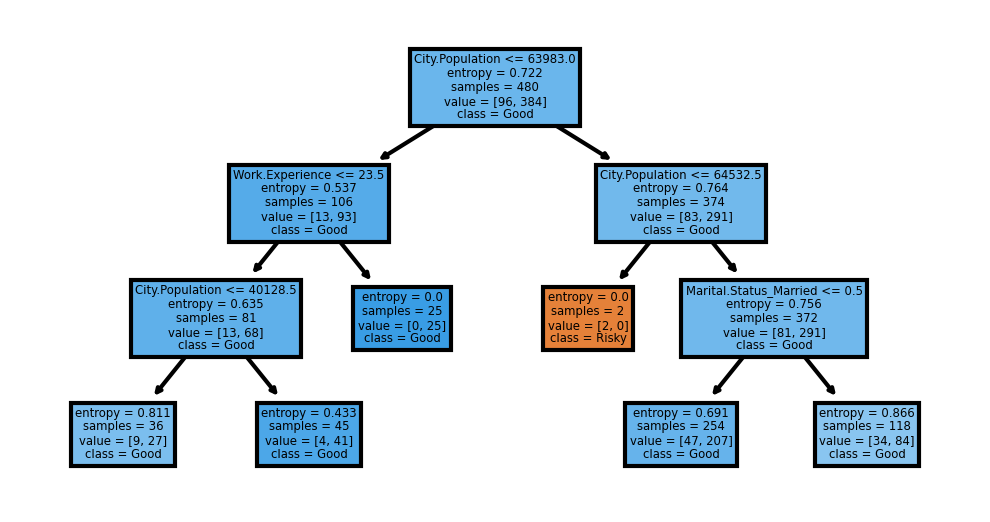

In [17]:
fn=['Undergrad',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,2), dpi=300)
tree.plot_tree(model, feature_names = fn, class_names=cn,filled = True)

In [18]:
model.feature_importances_ 

array([0.        , 0.55523026, 0.27033287, 0.        , 0.        ,
       0.17443688, 0.        ])

In [19]:
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

City.Population            0.555230
Work.Experience            0.270333
Marital.Status_Married     0.174437
Undergrad                  0.000000
Urban                      0.000000
Marital.Status_Divorced    0.000000
Marital.Status_Single      0.000000
dtype: float64

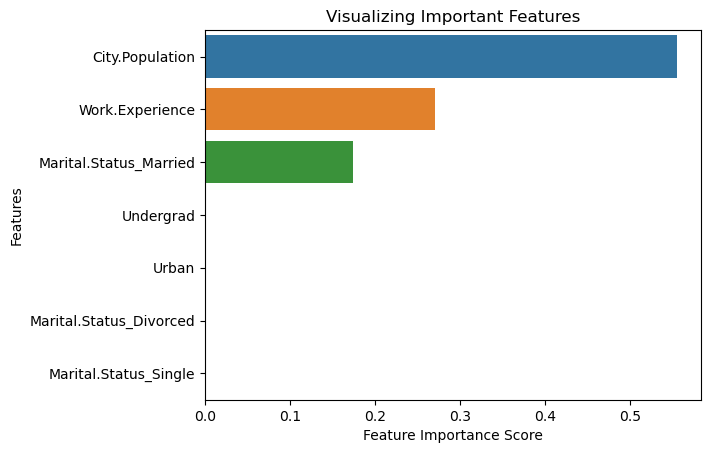

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [21]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  
     

1    120
dtype: int64

In [22]:
pd.crosstab(y_test,preds) 

col_0,1
Taxable.Income,
0,28
1,92


In [23]:
np.mean(preds==y_test)

0.7666666666666667

In [24]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [25]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [26]:
pred=model_gini.predict(x_test)
np.mean(preds==y_test) 

0.7666666666666667

In [27]:
model_gini.feature_importances_ 
     

array([0.        , 0.75212072, 0.        , 0.04753275, 0.        ,
       0.20034653, 0.        ])

In [28]:
feature_imp1 = pd.Series(model_gini.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp1

City.Population            0.752121
Marital.Status_Married     0.200347
Urban                      0.047533
Undergrad                  0.000000
Work.Experience            0.000000
Marital.Status_Divorced    0.000000
Marital.Status_Single      0.000000
dtype: float64

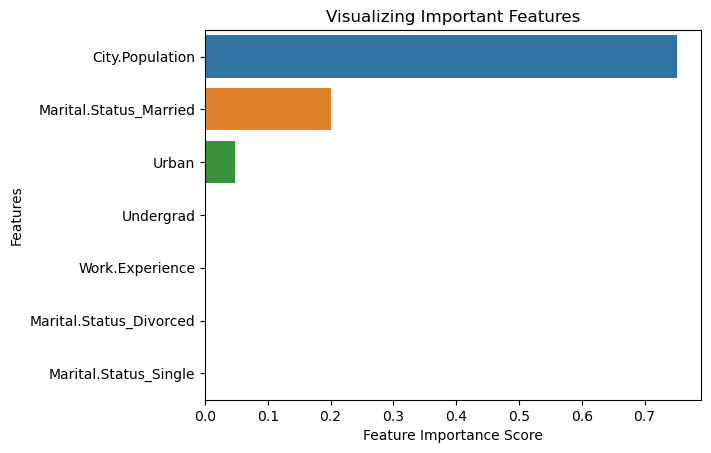

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp1, y=feature_imp1.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

 # A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [31]:
df=pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [33]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [34]:
df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [35]:
cat_sales = pd.cut(df['Sales'],bins=[-1,7.6,16.270],labels=['low sales','high sales'])
cat_sales

0      high sales
1      high sales
2      high sales
3       low sales
4       low sales
          ...    
395    high sales
396     low sales
397     low sales
398     low sales
399    high sales
Name: Sales, Length: 400, dtype: category
Categories (2, object): ['low sales' < 'high sales']

In [36]:
cat_sales.describe()

count           400
unique            2
top       low sales
freq            211
Name: Sales, dtype: object

In [37]:
df['Sales']=cat_sales
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high sales,138,73,11,276,120,Bad,42,17,Yes,Yes
1,high sales,111,48,16,260,83,Good,65,10,Yes,Yes
2,high sales,113,35,10,269,80,Medium,59,12,Yes,Yes
3,low sales,117,100,4,466,97,Medium,55,14,Yes,Yes
4,low sales,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,high sales,138,108,17,203,128,Good,33,14,Yes,Yes
396,low sales,139,23,3,37,120,Medium,55,11,No,Yes
397,low sales,162,26,12,368,159,Medium,40,18,Yes,Yes
398,low sales,100,79,7,284,95,Bad,50,12,Yes,Yes


In [38]:
le = preprocessing.LabelEncoder()
df['Urban']= le.fit_transform(df['Urban']) 
df['US']= le.fit_transform(df['US']) 
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high sales,138,73,11,276,120,Bad,42,17,1,1
1,high sales,111,48,16,260,83,Good,65,10,1,1
2,high sales,113,35,10,269,80,Medium,59,12,1,1
3,low sales,117,100,4,466,97,Medium,55,14,1,1
4,low sales,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,high sales,138,108,17,203,128,Good,33,14,1,1
396,low sales,139,23,3,37,120,Medium,55,11,0,1
397,low sales,162,26,12,368,159,Medium,40,18,1,1
398,low sales,100,79,7,284,95,Bad,50,12,1,1


In [39]:
x= df.iloc[:,1:]
x = pd.get_dummies(x)
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,138,73,11,276,120,42,17,1,1,1,0,0
1,111,48,16,260,83,65,10,1,1,0,1,0
2,113,35,10,269,80,59,12,1,1,0,0,1
3,117,100,4,466,97,55,14,1,1,0,0,1
4,141,64,3,340,128,38,13,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,1,0,1,0
396,139,23,3,37,120,55,11,0,1,0,0,1
397,162,26,12,368,159,40,18,1,1,0,0,1
398,100,79,7,284,95,50,12,1,1,1,0,0


In [40]:
y1 = df.iloc[:,0]
y1.describe()

count           400
unique            2
top       low sales
freq            211
Name: Sales, dtype: object

In [41]:
df['Sales']= le.fit_transform(df['Sales']) 
df['Sales'].describe()

count    400.000000
mean       0.527500
std        0.499868
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Sales, dtype: float64

In [42]:
max_height = max(df['Sales'])
print(max_height)
     

1


In [43]:
print("Max: ", pd.Series(df['Sales']).idxmax())

Max:  3


In [44]:
y = 1- df['Sales']
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: int32

In [45]:
y.value_counts() 
     

0    211
1    189
Name: Sales, dtype: int64

In [46]:
colnames = list(x.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'Urban',
 'US',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium']

In [47]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [48]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.4583333333333333, 0.875, 'X[4] <= 92.5\nentropy = 0.996\nsamples = 320\nvalue = [172, 148]'),
 Text(0.25, 0.625, 'X[3] <= 253.5\nentropy = 0.503\nsamples = 45\nvalue = [5, 40]'),
 Text(0.16666666666666666, 0.375, 'X[9] <= 0.5\nentropy = 0.811\nsamples = 20\nvalue = [5, 15]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.353\nsamples = 15\nvalue = [1, 14]'),
 Text(0.25, 0.125, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(0.6666666666666666, 0.625, 'X[10] <= 0.5\nentropy = 0.967\nsamples = 275\nvalue = [167, 108]'),
 Text(0.5, 0.375, 'X[4] <= 127.0\nentropy = 0.898\nsamples = 223\nvalue = [153, 70]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.982\nsamples = 145\nvalue = [84, 61]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.516\nsamples = 78\nvalue = [69, 9]'),
 Text(0.8333333333333334, 0.375, 'X[4] <= 156.5\nentropy = 0.84\nsamples = 52\nvalue = [14, 38]'),
 Text(0.75, 0.125, 'en

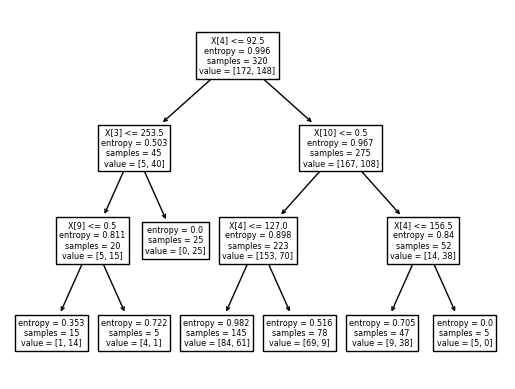

In [49]:
tree.plot_tree(model)

[Text(0.4583333333333333, 0.875, 'Price <= 92.5\nentropy = 0.996\nsamples = 320\nvalue = [172, 148]\nclass = low sales'),
 Text(0.25, 0.625, 'Population <= 253.5\nentropy = 0.503\nsamples = 45\nvalue = [5, 40]\nclass = high sales'),
 Text(0.16666666666666666, 0.375, 'ShelveLoc_Bad <= 0.5\nentropy = 0.811\nsamples = 20\nvalue = [5, 15]\nclass = high sales'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.353\nsamples = 15\nvalue = [1, 14]\nclass = high sales'),
 Text(0.25, 0.125, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = low sales'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 25\nvalue = [0, 25]\nclass = high sales'),
 Text(0.6666666666666666, 0.625, 'ShelveLoc_Good <= 0.5\nentropy = 0.967\nsamples = 275\nvalue = [167, 108]\nclass = low sales'),
 Text(0.5, 0.375, 'Price <= 127.0\nentropy = 0.898\nsamples = 223\nvalue = [153, 70]\nclass = low sales'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.982\nsamples = 145\nvalue = [84, 61]\nclass = low sales'),
 Tex

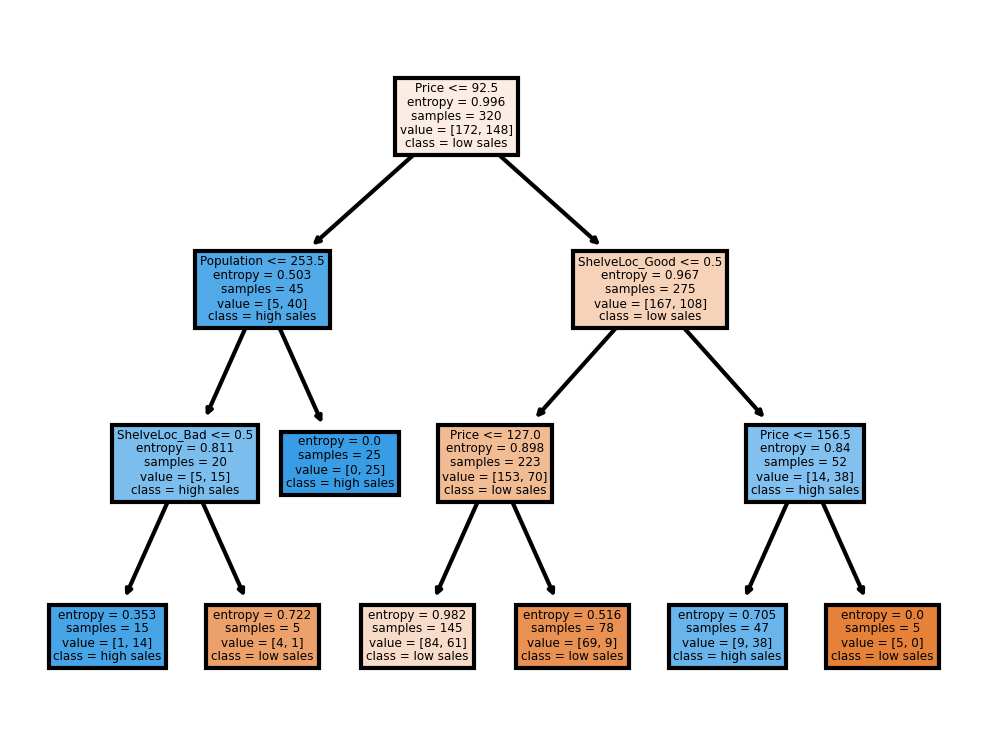

In [50]:
fn=['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'Urban',
 'US',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium']
cn=['low sales', 'high sales']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,3), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True)
     

In [51]:
model.feature_importances_ 

array([0.        , 0.        , 0.        , 0.06825531, 0.62088325,
       0.        , 0.        , 0.        , 0.        , 0.07776344,
       0.23309799, 0.        ])

In [52]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

Price               0.620883
ShelveLoc_Good      0.233098
ShelveLoc_Bad       0.077763
Population          0.068255
CompPrice           0.000000
Income              0.000000
Advertising         0.000000
Age                 0.000000
Education           0.000000
Urban               0.000000
US                  0.000000
ShelveLoc_Medium    0.000000
dtype: float64

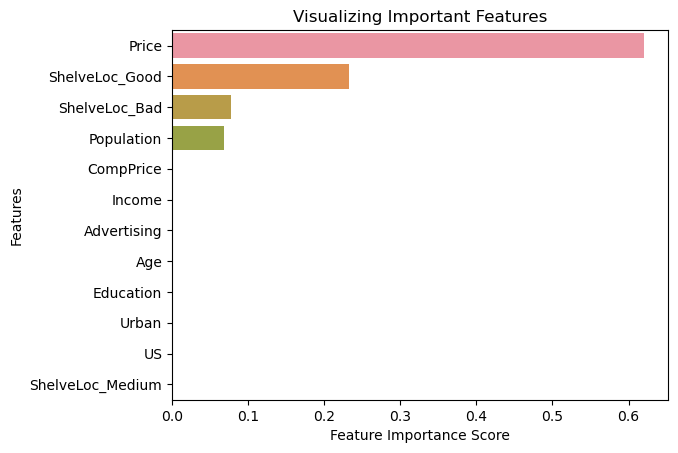

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [54]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts() 

0    49
1    31
dtype: int64

In [55]:
pd.crosstab(y_test,preds) 

col_0,0,1
Sales,,
0,34,5
1,15,26


In [56]:
np.mean(preds==y_test)

0.75

In [58]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [59]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [60]:
pred=model_gini.predict(x_test)
np.mean(preds==y_test)

0.75

In [61]:
model_gini.feature_importances_ 
     

array([0.00340665, 0.        , 0.        , 0.06715195, 0.44875281,
       0.18800703, 0.        , 0.        , 0.        , 0.02907011,
       0.26361145, 0.        ])

In [62]:
feature_imp1 = pd.Series(model_gini.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp1

Price               0.448753
ShelveLoc_Good      0.263611
Age                 0.188007
Population          0.067152
ShelveLoc_Bad       0.029070
CompPrice           0.003407
Income              0.000000
Advertising         0.000000
Education           0.000000
Urban               0.000000
US                  0.000000
ShelveLoc_Medium    0.000000
dtype: float64

[Text(0.5, 0.875, 'Price <= 92.5\ngini = 0.497\nsamples = 320\nvalue = [172, 148]\nclass = low sales'),
 Text(0.25, 0.625, 'ShelveLoc_Bad <= 0.5\ngini = 0.198\nsamples = 45\nvalue = [5, 40]\nclass = high sales'),
 Text(0.125, 0.375, 'CompPrice <= 101.0\ngini = 0.059\nsamples = 33\nvalue = [1, 32]\nclass = high sales'),
 Text(0.0625, 0.125, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]\nclass = high sales'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]\nclass = high sales'),
 Text(0.375, 0.375, 'Population <= 268.5\ngini = 0.444\nsamples = 12\nvalue = [4, 8]\nclass = high sales'),
 Text(0.3125, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = low sales'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = high sales'),
 Text(0.75, 0.625, 'ShelveLoc_Good <= 0.5\ngini = 0.477\nsamples = 275\nvalue = [167, 108]\nclass = low sales'),
 Text(0.625, 0.375, 'Age <= 49.5\ngini = 0.431\nsamples = 223\nvalue = [153, 70]\nclass = low sales'),
 Text(0.562

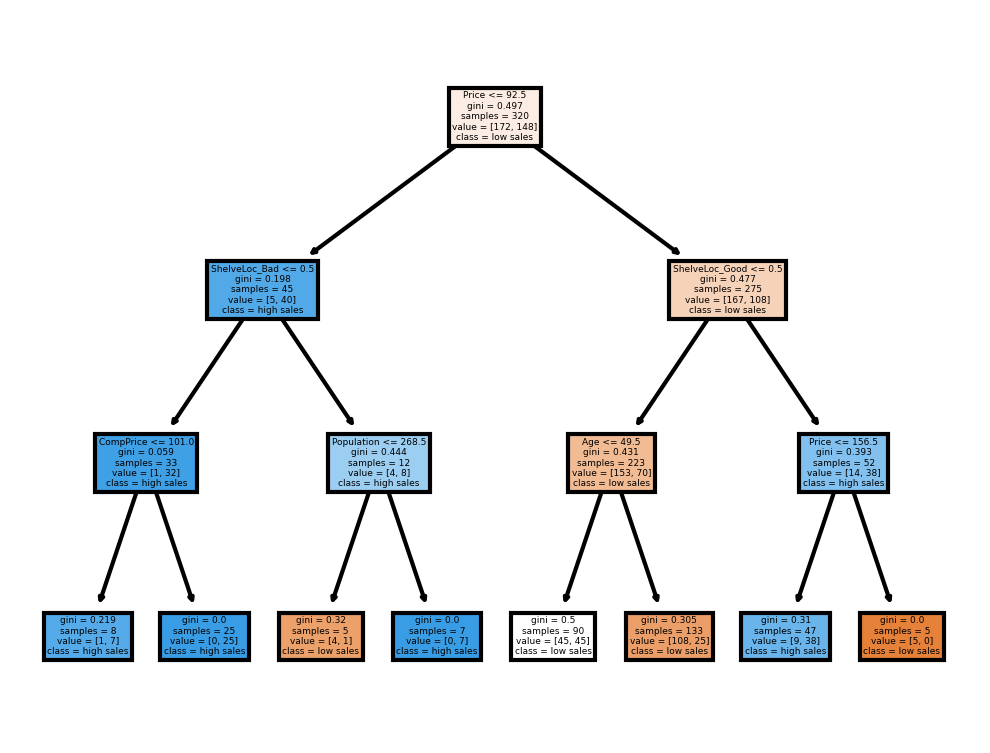

In [63]:
fn=['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'Urban',
 'US',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium']
cn=['low sales', 'high sales']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,3), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True)

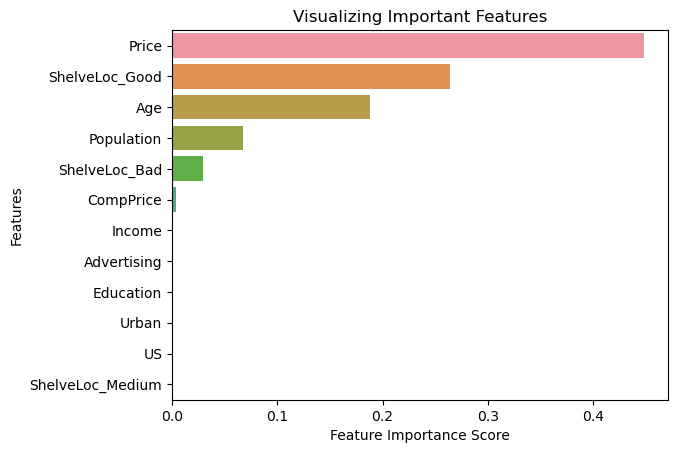

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp1, y=feature_imp1.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()